In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/craigslist-vehicles/craigslist_vehicles.csv')
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,303849,7307070484,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,5100,2009.0,NaN,saab 9-7x,fair,...,SUV,grey,https://images.craigslist.org/00b0b_dsIhheG86S...,For sale: 2009 Saab 9-7x Fair condition AWD ...,NaN,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,303706,7314635557,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,7500,2011.0,ford,f-450,good,...,bus,red,https://images.craigslist.org/00b0b_8lBfNkZ6pr...,"2011 E-Ford 450 with 177k miles, 6.8 liter v-1...",NaN,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,303704,7314710341,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,25000,2016.0,chevrolet,silverado,excellent,...,truck,blue,https://images.craigslist.org/00k0k_jw0Pda6LTk...,2013 Silverado excellent condition. Blue in co...,NaN,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,303670,7316225330,https://zanesville.craigslist.org/cto/d/zanesv...,zanesville / cambridge,https://zanesville.craigslist.org,6,1986.0,NaN,camaro iroc z28,good,...,NaN,red,https://images.craigslist.org/00Y0Y_avlrYDn7OY...,"1986 Iroc Z28 , T-tops , 86,500 miles , has ne...",NaN,oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00


In [2]:
# Fill missing values with median for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values with mode for categorical columns
categorical_cols = df.select_dtypes(include=[np.object]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

/tmp/ipykernel_32/186623688.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = df.select_dtypes(include=[np.object]).columns


In [3]:
# Convert 'posting_date' column to datetime
df['posting_date'] = pd.to_datetime(df['posting_date'])


In [4]:
# Set 'posting_date' as the index
df.set_index('posting_date', inplace=True)


In [8]:
df.sort_values(by='posting_date', inplace=True)


In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'removal_date'],
      dtype='object')

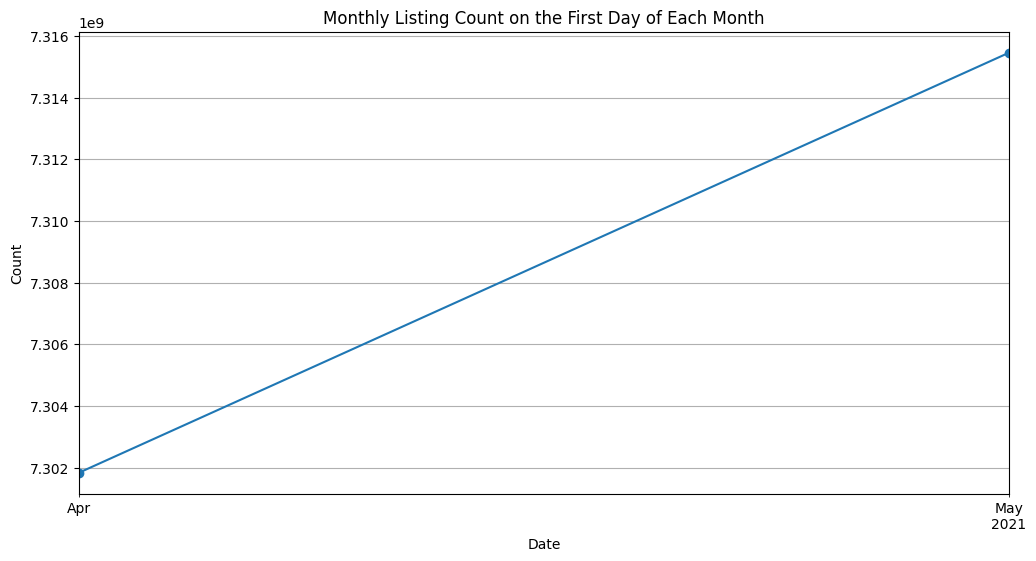

In [7]:
import matplotlib.pyplot as plt

# Resample the data to a monthly frequency and select the first day of each month
monthly_first_day = df.resample('MS').first()

# Example: Plotting the count of listings on the first day of each month
monthly_first_day['id'].plot(marker='o', linestyle='-', figsize=(12, 6))
plt.title('Monthly Listing Count on the First Day of Each Month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


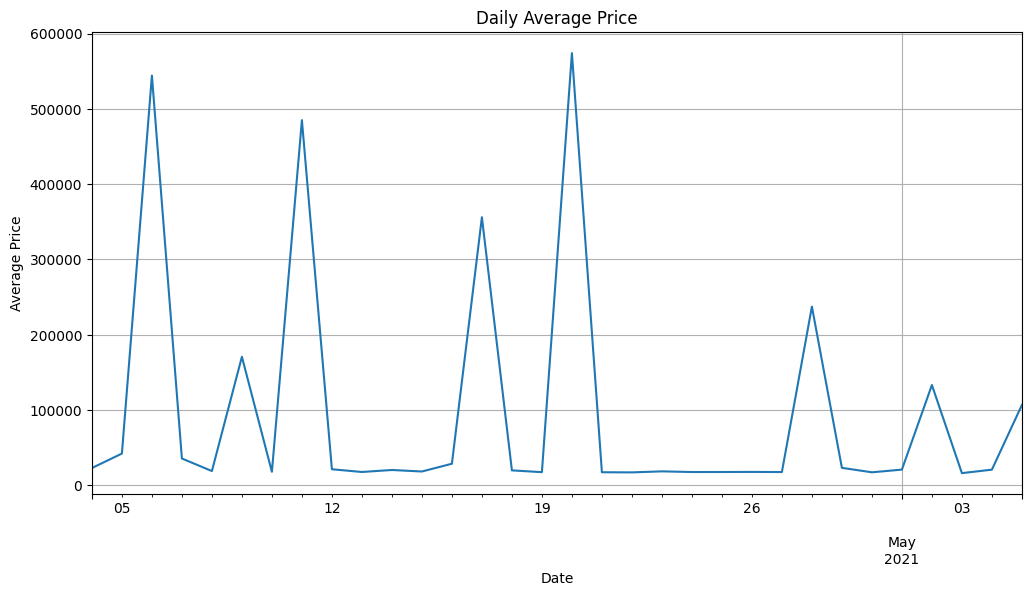

In [11]:
import matplotlib.pyplot as plt

# Resample the data on a daily frequency and calculate the daily average price
daily_average_price = df['price'].resample('D').mean()

# Plot the daily average price
plt.figure(figsize=(12, 6))
daily_average_price.plot()
plt.title('Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()
